In [14]:
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil
import matplotlib.pyplot as plt
import glob, os
import itertools

drink_glass = pd.concat(map(lambda l : pd.read_csv(l,
                                                   header=None,
                                                   delimiter=r"\s+",
                                                   index_col = None,
                                                   names = ['ax', 'ay', 'az']),
                            glob.glob(os.path.join('', "HMP_Dataset/Drink_glass/*.txt"))))
eat_soup = pd.concat(map(lambda l : pd.read_csv(l,
                                                   header=None,
                                                   delimiter=r"\s+",
                                                   index_col = None,
                                                   names = ['ax', 'ay', 'az']),
                            glob.glob(os.path.join('', "HMP_Dataset/Eat_soup/*.txt"))))
getup_bed = pd.concat(map(lambda l : pd.read_csv(l,
                                                   header=None,
                                                   delimiter=r"\s+",
                                                   index_col = None,
                                                   names = ['ax', 'ay', 'az']),
                            glob.glob(os.path.join('', "HMP_Dataset/Getup_bed/*.txt"))))
liedown_bed = pd.concat(map(lambda l : pd.read_csv(l,
                                                   header=None,
                                                   delimiter=r"\s+",
                                                   index_col = None,
                                                   names = ['ax', 'ay', 'az']),
                            glob.glob(os.path.join('', "HMP_Dataset/Liedown_bed/*.txt"))))
walk = pd.concat(map(lambda l : pd.read_csv(l,
                                                   header=None,
                                                   delimiter=r"\s+",
                                                   index_col = None,
                                                   names = ['ax', 'ay', 'az']),
                            glob.glob(os.path.join('', "HMP_Dataset/Walk/*.txt"))))
#sitdown_chair = pd.concat(map(lambda l : pd.read_csv(l,
#                                                   header=None,
#                                                   delimiter=r"\s+",
#                                                   index_col = None,
#                                                   names = ['ax', 'ay', 'az']),
#                            glob.glob(os.path.join('', "HMP_Dataset/Sitdown_chair/*.txt"))))
#standup_chair = pd.concat(map(lambda l : pd.read_csv(l,
#                                                   header=None,
#                                                   delimiter=r"\s+",
#                                                   index_col = None,
#                                                   names = ['ax', 'ay', 'az']),
#                            glob.glob(os.path.join('', "HMP_Dataset/Standup_chair/*.txt"))))
#use_telephone = pd.concat(map(lambda l : pd.read_csv(l,
#                                                   header=None,
#                                                   delimiter=r"\s+",
#                                                   index_col = None,
#                                                   names = ['ax', 'ay', 'az']),
#                            glob.glob(os.path.join('', "HMP_Dataset/Use_telephone/*.txt"))))

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
    #print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [16]:
#classes = ['drinking', 'eating','getting_up','lying_down','walking', 'sitting_down','standing_up','in_a_call']
classes = ['drinking', 'eating','getting_up','lying_down','walking']
drink_glass['label'] = ['drinking']*len(drink_glass)
eat_soup['label'] = ['eating']*len(eat_soup)
getup_bed['label'] = ['getting_up']*len(getup_bed)
liedown_bed['label'] = ['lying_down']*len(liedown_bed)
walk['label'] = ['walking']*len(walk)
#sitdown_chair['label'] = ['sitting_down']*len(sitdown_chair)
#standup_chair['label'] = ['standing_up']*len(standup_chair)
#use_telephone['label'] = ['in_a_call']*len(use_telephone)

#it = [drink_glass, eat_soup, getup_bed, liedown_bed, walk, sitdown_chair, standup_chair, use_telephone]
it = [drink_glass, eat_soup, getup_bed, liedown_bed, walk]

train_data = [pd.DataFrame()]*len(it)
test_data = [pd.DataFrame()]*len(it)
i = 0
for item in it:
    train_size = floor(0.8*len(item))
    item_tr = item.iloc[0:train_size]
    train_data[i] = item_tr.loc[:,('ax','ay','az','label')]
    item_te = item.iloc[train_size:]
    test_data[i] = item_te.loc[:,('ax','ay','az','label')]
    i+=1
    
train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

#Converting the sensor data to real acceleration data
conv = lambda l: -14.709 + (l/63)*(2*14.709)         
train_df.loc[:,('ax','ay','az')]=train_df.loc[:,('ax','ay','az')].apply(conv)
test_df.loc[:,('ax','ay','az')]=test_df.loc[:,('ax','ay','az')].apply(conv)

#Smoothing using moving average
train_df.loc[:,('ax','ay','az')]=train_df.loc[:,('ax','ay','az')].rolling(center=True,window=5).median()
test_df.loc[:,('ax','ay','az')]=test_df.loc[:,('ax','ay','az')].rolling(center=True,window=5).median()

#Cleaning some missing data
train_df = train_df.sample(frac=1).reset_index(drop=True).iloc[2:len(train_df)-3].fillna(15)
test_df = test_df.sample(frac=1).reset_index(drop=True).iloc[2:len(test_df)-3].fillna(15)

Quadratic Discriminat:
	Precision: 0.6519820585641896
	Recall: 0.7071344206267434
	F-Score: 0.6626427426804585



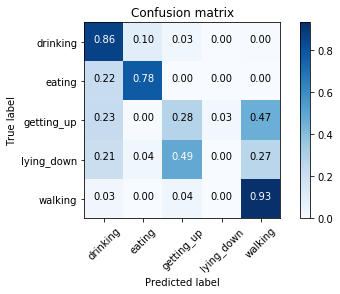

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

######### Uncoment the name of the classifier that you want to tune ###########
names = [
    #"Nearest Neighbors",
    #"Support Vector Machine"
    #"Decision Tree",
    #"Random Forest",
    #"Neural Net",
    #"AdaBoost",
    #"Naive Bayes",
    "Quadratic Discriminat"
]
######### Uncoment the classifier that you want to tune ###########
classifiers = [
    #KNeighborsClassifier(100),
    #SVC(gamma=2, C=0.1),
    #DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=3),
    #MLPClassifier(hidden_layer_sizes = (100,20), alpha=1),
    #AdaBoostClassifier(),
    #GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
    

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(train_df.loc[:,('ax','ay', 'az')].as_matrix(),train_df.loc[:,'label'].as_matrix())
    labels = clf.predict(test_df.loc[:,('ax','ay', 'az')].as_matrix())
    #[p,r,f,s] = precision_recall_fscore_support(test_df.loc[:,'label'].as_matrix(),list(labels))
    #print(name + ':')
    #print('\t Precision: '+str(p)+', Recall: '+str(r)+', F-Score: '+str(f)+'\n')
    print(name+':')
    p,r,f,s = precision_recall_fscore_support(test_df.loc[:,'label'].as_matrix(),labels, average = 'weighted')
    print('\tPrecision: '+str(p)+'\n\tRecall: '+str(r)+'\n\tF-Score: '+str(f)+'\n')
    cnf_matrix = confusion_matrix(test_df.loc[:,'label'].as_matrix(),list(labels))
    plot_confusion_matrix(cnf_matrix,classes, normalize=True,
                      title='Confusion matrix')
    plt.show()
   
    

In [ ]:
train_df.loc[:,('ax','ay', 'az')].plot()

In [ ]:
train_df